<a href="https://colab.research.google.com/github/Nithya153/devops/blob/main/Desktop_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Melbourne housing price prediction

# ##FLOW CHART



1. Importing libraries
2. Importing datasets
3. Preprocessing
4. Identifying and handling missing values
5. Visualization
6. Encoding categorical features to numerical
7. Splitting the data and Scaling
8. Model building

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [16]:
file1 = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
file1.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [17]:
file2 = pd.read_csv('Melbourne_housing_FULL.csv')
file2.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [18]:
df = pd.merge(file1,file2)

In [19]:
df.shape

(21001, 21)

In [20]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,1/07/2017,3067,Northern Metropolitan,...,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,1/07/2017,3042,Western Metropolitan,...,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,...,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,...,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,101.37,1960.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,1/07/2017,3042,Western Metropolitan,...,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,NaN,1950.0,-37.72274,144.88002


In [21]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4547
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
Bedroom2          5248
Bathroom          5257
Car               5759
Landsize          8825
BuildingArea     13246
YearBuilt        12344
Lattitude         5107
Longtitude        5107
dtype: int64

In [22]:
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mode()[0])
df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].mean())
df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())


In [23]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
dtype: int64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

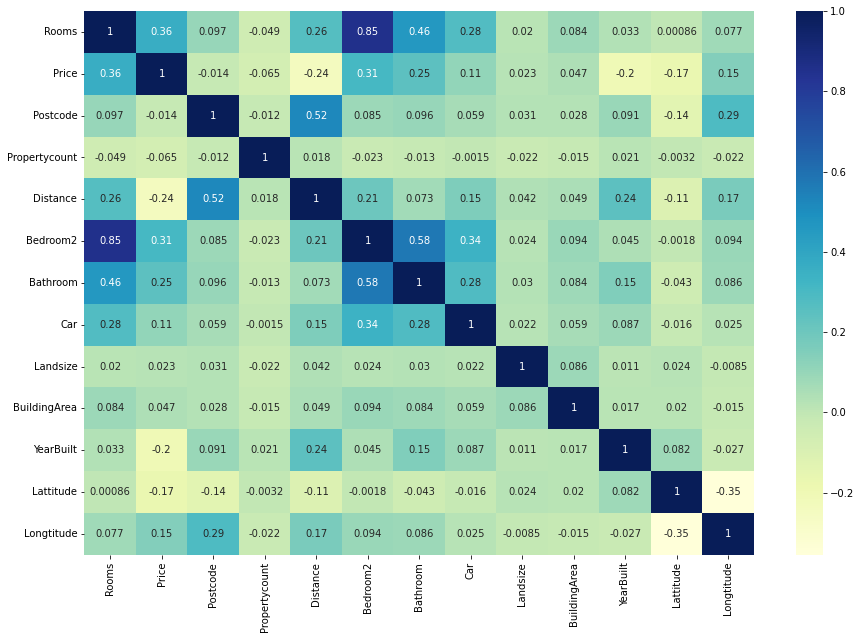

In [25]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

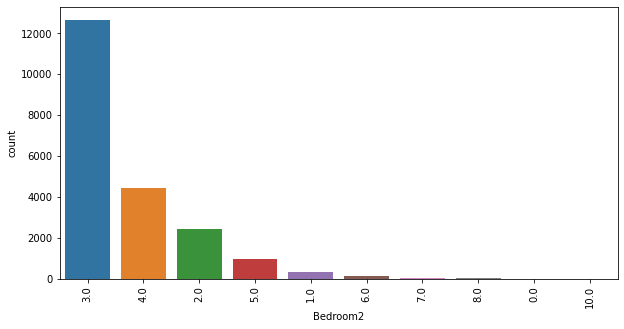

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Bedroom2',data=df, ax = ax, order = df['Bedroom2'].value_counts().iloc[:10].index)

In [27]:
#3 bedrooms house are more

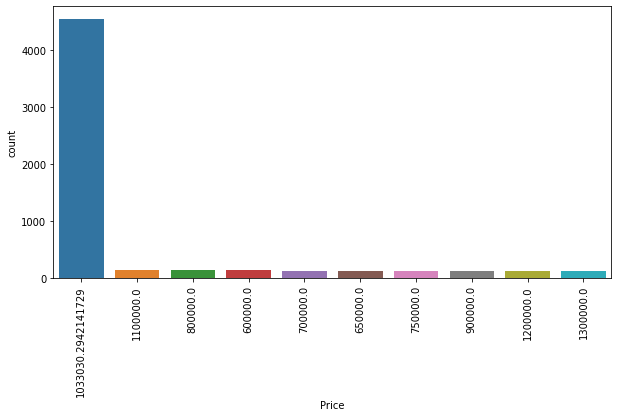

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Price',data=df, ax = ax, order = df['Price'].value_counts().iloc[:10].index)

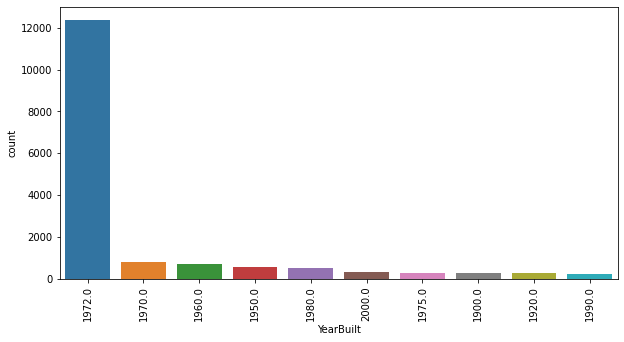

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='YearBuilt',data=df, ax = ax, order = df['YearBuilt'].value_counts().iloc[:10].index)

1972 yearbulit buildings are more

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:

df['Type'] = le.fit_transform(df['Type'])
df['Method'] = le.fit_transform(df['Method'])


In [32]:
df = df.drop(['Suburb'],axis=1)

In [33]:
df = df.drop(['SellerG'],axis=1)

In [34]:
df = df.drop(['Date'],axis=1)

In [35]:
df = df.drop(['CouncilArea'],axis=1)

In [36]:
data=pd.get_dummies(df,drop_first=True)

In [37]:
X=data.drop(['Price'],axis = 1)
Y=data['Price']
X.head()

,Rooms,Type,Method,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,...,Address_9a Lois Ct,Address_9b Bewdley St,Address_9b Stewart St,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3,0,2,3067,4019,3.0,3.0,2.0,2.0,701.120483,...,0,0,0,0,1,0,0,0,0,0
1,3,0,5,3042,3464,10.4,3.0,2.0,2.0,701.120483,...,0,0,0,0,0,0,0,0,1,0
2,2,2,2,3042,3464,10.4,3.0,2.0,2.0,701.120483,...,0,0,0,0,0,0,0,0,1,0
3,3,0,2,3042,3464,10.4,3.0,1.0,2.0,219.000000,...,0,0,0,0,0,0,0,0,1,0
4,3,0,2,3042,3464,10.4,3.0,1.0,2.0,717.000000,...,0,0,0,0,0,0,0,0,1,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [41]:
from sklearn.linear_model import Ridge
sk_model = Ridge(alpha=1)

In [42]:
model = sk_model.fit(X_train, y_train)

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred)

[1176730.75726999 1118087.21837571 1363417.86475248 ...  883704.06396097
 1063452.14013607 1434689.04900976]


In [45]:
from sklearn import metrics
print('Ridge_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Ridge_Regression
r2_score 21.94
Adjusted_r2_score 134.20
MAE: 324315.69
RMSE: 485033.24


In [ ]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01 )
    model.fit( X_train, y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    

      
   
      
if __name__ == "__main__" : 
    main()

In [ ]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 10)
model.fit( X_train, y_train )

In [ ]:
Y_pred = model.predict( X_test ) 

In [ ]:
mse = np.mean((Y_pred - y_test)**2)
r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)

print("MSE:", mse)
print("R-squared:", r2*100)
print("MAE:", mae)

In [ ]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01 )
    model.fit( X_train, y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    

      
   
      
if __name__ == "__main__" : 
    main()